## Recommendation systems for Movie
### Context
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.



## Content
This dataset consists of the following files:

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies

## Problem statement
1. Predicting movie revenue and/or movie success based on a certain metric. 
2. What movies tend to get higher vote counts and vote averages on TMDB? 
3. Building Content Based and Collaborative Filtering Based Recommendation Engines.

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Loading the dataset

In [3]:
metadata = pd.read_csv('movies_metadata.csv')
print(metadata.shape)
metadata.head()

(45466, 24)


C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
ratings = pd.read_csv('ratings_small.csv')
print(ratings.shape)
ratings.head()

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [11]:
ratings['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
221      20
444      20
484      20
35       20
485      20
Name: userId, Length: 671, dtype: int64

In [12]:
metadata.corr()

,revenue,runtime,vote_average,vote_count
revenue,1.000000,0.103917,0.083868,0.812022
runtime,0.103917,1.000000,0.158146,0.113539
vote_average,0.083868,0.158146,1.000000,0.123607
vote_count,0.812022,0.113539,0.123607,1.000000


# Recommending top 10 movies

## Demographic Filtering

To recommend top ten hit movies to viewers, we can make use of vote count and vote average. Here its not reviewed to know the viewers behaviour instead ratings give by different viewers to a particular movie is taken into consideration to chose the top ten movies.

We can't consider average vote alone for selecting the top ten hit moviews. For eg Movie X might has got only 3 viewers and  all the three might have liked it and given good rating resulting in 4.5 score, where as movie Y has 200 views and average rating is 4.1. In this case by considering only vote average we are not doing justice to moview Y hence we have to consider both the parameter for calculating the popularity.   

Hence its preferable to use IMDB's weighted rating (wr) 

wr = (v/v+m)*R + (m/m+v)*C

where,

- v is the number of votes for the movie;
- m is the minimum votes required for the movie to qualify;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

In [14]:
C = metadata['vote_average'].mean()
C

5.618207215133889

In [31]:
print("Max avg vote is : %d" %(metadata['vote_average'].max())) 
print('Min avg vote is: %d' %(metadata['vote_average'].min()))

Max avg vote is : 10
Min avg vote is: 0


Mean vote across the whole report is 5 out of 10.

In [32]:
print("Max vote count is : %d" %(metadata['vote_count'].max())) 
print('Min vote count is : %d' %(metadata['vote_count'].min()))


Max vote count is : 14075
Min vote count is : 0


Let us consider 10% as the maximum votes to qualify for the search of hit movies. Hence use quantile(0.9) to find 10% of maximum votes. 

In [34]:
m = metadata['vote_count'].quantile(0.9)
m

160.0

Fetch those movies that qualify the criteria m

In [37]:
movies_above_m = metadata.copy().loc[metadata['vote_count'] >= m]
movies_above_m.shape

(4555, 24)

In [52]:
def IMDB_weighted_rating(a):
    v = a['vote_count']
    R = a['vote_average']
    return(v/(v+m)*R) + (m/(m+v) * C)

In [53]:
movies_above_m['wt_rating'] = movies_above_m.apply(IMDB_weighted_rating, axis=1)

In [49]:
movies_above_m.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,wt_rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640253
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820293
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660700
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,7.537201
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,5.556626


In [54]:
#Sort movies based on IMDB_weighted_rating 
movies_above_m = movies_above_m.sort_values('wt_rating', ascending=False)
movies_above_m.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,wt_rating
314,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,8.445869
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,8.425439
10309,False,NaN,13200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,1.000000e+08,190.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0,8.421453
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.265477
2843,False,NaN,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0,8.256385
292,False,NaN,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",...,2.139288e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,False,8.3,8670.0,8.251406
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
23673,False,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,244786,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,1.309200e+07,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,False,8.3,4376.0,8.205404
5481,False,NaN,15000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://movies.disney.com/spirited-away,129,tt0245429,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,...,2.749251e+08,125.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,False,8.3,3968.0,8.196055
2211,False,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,637,tt0118799,it,La vita è bella,A touching story of an Italian book seller of ...,...,2.294000e+08,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An unforgettable fable that proves love, famil...",Life Is Beautiful,False,8.3,3643.0,8.187171


In [55]:
movies_above_m[['original_title', 'vote_count', 'vote_average', 'wt_rating']].head(10)

,original_title,vote_count,vote_average,wt_rating
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,千と千尋の神隠し,3968.0,8.3,8.196055
2211,La vita è bella,3643.0,8.3,8.187171


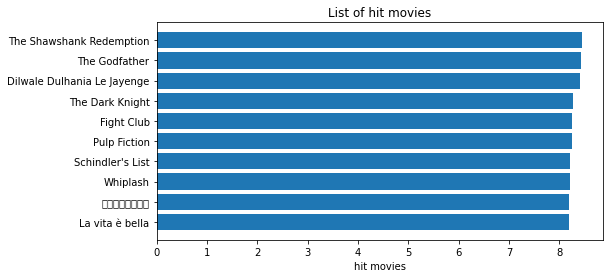

In [60]:
plt.figure(figsize=(8,4))
plt.barh(movies_above_m['original_title'].head(10), movies_above_m['wt_rating'].head(10))
plt.gca().invert_yaxis()
plt.xlabel("hit movies")
plt.title("List of hit movies")
plt.show()

Above graph displays the top ten hit movies which is based on the viewers voting. Note it is not personalized to viewers but gives the general openion of viewers.

## Building Content Based Recommendation Engines

In the Content based recommendadtion system as the name suggests recommendation is based on the content of the movie. Here of the content of the movie is used to find the similarities, similar movies are recommended to viewers.  

'overview' of the movie provide sufficient information to carry out content based filtering.

In [61]:
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [67]:
metadata.shape

(45466, 24)

Taking sample of metadata to carry on further steps of content based filtering. This is done to minimize the memory that is required to find the similary from tfidf matrix. 

In [69]:
metadata_sample = metadata.head(20000)

In [70]:
print(metadata_sample.shape)
metadata_sample.head()

(20000, 24)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Text processing technique Term Frequency-Inverse Document Frequency (TF-IDF) vectors shall be used to fetch important words from overview which will be later used to find similarities.
TF-IDF matrix comprise of number of movies as rows and words as column, TfIdfVectorizer class from Scikitlearn will be used to find TF-IDF.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tfidf = TfidfVectorizer(stop_words='english')
metadata_sample['overview'] = metadata_sample['overview'].fillna('')
tfidf_matx = tfidf.fit_transform(metadata_sample['overview'])
tfidf_matx.shape

<ipython-input-71-e934db99fc3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_sample['overview'] = metadata_sample['overview'].fillna('')


(20000, 47487)

In [72]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matx, tfidf_matx)

In [75]:
cosine_sim

array([[1.        , 0.01575748, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01575748, 1.        , 0.04907345, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04907345, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.08375766],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08375766, 0.        ,
        1.        ]])

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. 

Given a movie title find the index of the movie.

In [77]:
indices = pd.Series(metadata_sample.index, index=metadata_sample['title']).drop_duplicates()

In [78]:
indices

title
Toy Story                                                                       0
Jumanji                                                                         1
Grumpier Old Men                                                                2
Waiting to Exhale                                                               3
Father of the Bride Part II                                                     4
                                                                            ...  
Rebellion                                                                   19995
Versailles                                                                  19996
Two in the Wave                                                             19997
Lotte Reiniger: Homage to the Inventor of the Silhouette Film               19998
RKO Production 601: The Making of 'Kong, the Eighth Wonder of the World'    19999
Length: 20000, dtype: int64

In [80]:
def cosin_sim_recommendation(title):
    index = indices[title]
    sim_rating = list(enumerate(cosine_sim[index]))
    sim_rating = sorted(sim_rating, key=lambda x:x[1], reverse = True)
    sim_rating = sim_rating[1:11]
    movie_index = [i[0] for i in sim_rating]
    return metadata_sample['title'].iloc[movie_index]

In [81]:
cosin_sim_recommendation('Toy Story')

15348               Toy Story 3
2997                Toy Story 2
10301    The 40 Year Old Virgin
8327                  The Champ
1071      Rebel Without a Cause
11399    For Your Consideration
1932                  Condorman
3057            Man on the Moon
485                      Malice
11606              Factory Girl
Name: title, dtype: object

In [82]:
cosin_sim_recommendation('Versailles')

19090                Nina Frisk
10299            Do Fish Do It?
17076                    Ghosts
15821       Come Blow Your Horn
7722                 The Mother
16238                The Mirror
16618    Rich, Young and Pretty
3950                  Two Ninas
4065                      Alfie
1316                   Ridicule
Name: title, dtype: object

## Collaborative Filtering

Collaborative filtering are more personalized to user or product unlike content based or demographic filter. 

It is basically of two types:-
- User based filtering - recommend products to a user that similar users have liked. Users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.
- Item Based Collaborative Filtering - recommend items based on their similarity with the items that the target user rated.

The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.

In [105]:
from surprise import SVD, Reader 
#The Reader class is used to parse a file containing ratings.
from surprise import Dataset
from surprise.model_selection import cross_validate

In [89]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Lets use ratings_small dataset since it has got userid.

In [100]:
reader = Reader()

In [101]:
ratings_surp = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [103]:
algo = SVD()

In [106]:
# Run 5-fold cross-validation and print results
cross_validate(algo, ratings_surp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9017  0.8948  0.8927  0.8968  0.9002  0.8972  0.0033  
MAE (testset)     0.6932  0.6890  0.6859  0.6903  0.6945  0.6906  0.0031  
Fit time          4.60    4.74    5.11    4.82    4.63    4.78    0.19    
Test time         0.14    0.15    0.14    0.13    0.13    0.14    0.01    


{'test_rmse': array([0.90168695, 0.89484139, 0.8926953 , 0.89680334, 0.90018791]),
 'test_mae': array([0.69322342, 0.68897777, 0.68592803, 0.6903077 , 0.69452376]),
 'fit_time': (4.595978736877441,
  4.736282825469971,
  5.113358974456787,
  4.818156480789185,
  4.628710508346558),
 'test_time': (0.137160062789917,
  0.15188813209533691,
  0.1353156566619873,
  0.1274566650390625,
  0.12655878067016602)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is good enough.

In [108]:
#Do not split the dataset into folds and just return a trainset as is, built from the whole dataset.
trainset = ratings_surp.build_full_trainset()
algo.fit(trainset)

Let us pick few users with user Id 1 and check the ratings she/he has given.

In [110]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [111]:
ratings[ratings['userId'] == 5]

,userId,movieId,rating,timestamp
351,5,3,4.0,1163374957
352,5,39,4.0,1163374952
353,5,104,4.0,1163374639
354,5,141,4.0,1163374242
355,5,150,4.0,1163374404
...,...,...,...,...
446,5,35836,4.0,1163374275
447,5,40819,4.5,1163374283
448,5,41566,4.0,1163374144
449,5,41569,4.0,1163374167


In [114]:
# We can now predict ratings by directly calling the predict() method. Let’s say userid is 2 and movie id is 302 and the true rating rui=3
algo.predict(2, 302, 3)

Prediction(uid=2, iid=302, r_ui=3, est=3.4620149262119213, details={'was_impossible': False})

In [115]:
algo.predict(5, 39, 4)

Prediction(uid=5, iid=39, r_ui=4, est=3.7328639432880935, details={'was_impossible': False})

For movieid 39 estimated prediction of 3.732. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.